given X

1.create graph (implement all 3 versions - fully connected, eps-neiborghood, KNN graph

2.Calculate adjacency matrix W

3.Calculate diagonal matrix D

4.calculate laplasian, laplassian normed and laplassian symmetric

5.calculate K smallest eigenvalues of laplasian (starting from second)

6.get eigenvectors for that eigenvalues

7.fit kmeans on it

8.visualize result

-- number of eigenvalues equal to 0 should be the same as number of connected components

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
class SpectralClustering:
    def __init__(self, n_clusters=2, sigma=1, epsilon=1e-6, graph='fully_connected', n_neighbours=10, l_type='standart'):
        self.n_clusters = n_clusters
        self.sigma = sigma
        self.epsilon = epsilon
        self.graph = graph
        self.n_neighbours = n_neighbours
        self.l_type = l_type
        
        if self.graph == 'nearest_neighbours':
            self.l_type = 'symmetric'
    
    def get_W(self, X):
        W = rbf_kernel(X, X, gamma=1/(self.sigma**2))
        np.fill_diagonal(W, 0)
        if self.graph == 'fully_connected':
            return W
        elif self.graph == 'nearest_neighbours':
            for i in range(len(W)):
                W[i][np.argsort(W[i])[:-self.n_neighbours]] = 0
            return np.maximum(W, W.T)
        elif self.graph == 'epsilon_neighborhood':
            return W * (W>self.epsilon)
             
    def get_D(self, W):
        return np.diag(W.sum(axis=1))
    
    def get_laplacian(self, D, W):
        if self.l_type == 'standart':
            return D-W
        elif self.l_type == 'symmetric':
            return np.identity(len(D)) - np.sqrt(np.linalg.inv(D)) @ W @ np.sqrt(np.linalg.inv(D))
    
    def get_eigenvectors(self, L):
        values, vectors = np.linalg.eigh(L)
        return vectors[:, np.argsort(values)[1:self.n_clusters]]
    
    def fit_predict(self, X):
        W = self.get_W(X)
        D = self.get_D(W)
        L = self.get_laplacian(D, W)
        eigenvectors = self.get_eigenvectors(L)
        return KMeans(self.n_clusters).fit_predict(eigenvectors)
    

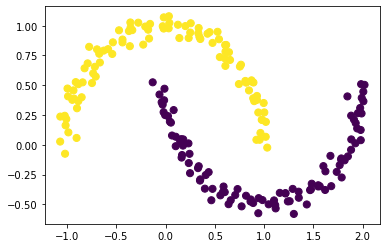

In [3]:
c = SpectralClustering(2, graph='epsilon_neighborhood', epsilon=0.85)
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = c.fit_predict(X), s=50)